In [1]:
from scipy.io import wavfile
import numpy as np
import os
import pandas as pd
from pliers.extractors import RMSExtractor
from scipy import signal


In [2]:
lenghts = np.zeros((3,9))
TR = 2.0 
ext = RMSExtractor()

common_run_lenghts = [291, 315, 338, 308, 283, 371, 340, 293, 368]

for curr_run in range(0,9):
    print(curr_run+1)
    
    curr_com_length = common_run_lenghts[curr_run]
    #print(curr_com_length)
    #print('###')
    
    # English
    curr_data = np.load("../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppEN-run-0" + str(curr_run+1) + ".npy")
    #print(curr_data.shape[0])    
    #length_fmri_sec = curr_data.shape[0]* TR
    #print(length_fmri_sec)
    
    #mins, secs = divmod(length_fmri_sec, 60)
    #fstr = str(int(mins)) + ':' + str(secs) 
    #print("Scan duration: "+ fstr)
      
    audio_file = '../data_lpp/story_data/lpp_en_audio/stimuli_task-lppEN_section-' + str(curr_run+1) + '.wav'
    samplerate, wavdata = wavfile.read(audio_file)
    #seconds = float(wavdata.shape[0])/samplerate
    #print("Wav Duration Secs: "+ str(seconds))
    
    #mins, secs = divmod(seconds, 60)
    #tstr = str(int(mins)) + ':' + str(secs) 
    #print("Wav Duration: "+ tstr)
   
    text = pd.read_csv('../data_lpp/story_data/lpp_en_audio/annotation_EN_lppEN_section' + str(curr_run+1) + '.TextGrid.csv')
    last_word_end = text.iloc[-1].onset
    #print("Last word Secs: " + str(last_word_end))
    
    #wmins, wsecs = divmod(last_word_end, 60)
    #wstr = str(int(wmins)) + ':' + str(wsecs) 
    #print("Last word: "+ wstr)
    
    # compute the audioresample:
    audio_temp = '../data_lpp/story_data/' + 'stimuli_task-lppEN_section-' + str(curr_run+1) + '_TEMP_RESAMPLED.wav'
    wavfile.write(audio_temp, samplerate, wavdata[:int(last_word_end*samplerate)])
    rms_result = ext.transform(audio_temp)
    rms_result_df = rms_result.to_df()
       
    res_rms = signal.resample(rms_result_df['rms'].values, wavdata[:int(last_word_end*samplerate)].shape[0])
    resampled_audio_feature = signal.resample(rms_result_df['rms'].values, curr_com_length)
    
    out_file = "../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/" + 'resampled_audiofeature_en_section' + str(curr_run+1) + '.npy'
    np.save(out_file, resampled_audio_feature)
    
    print('### ### ###')

    #Chinese
    curr_data = np.load("../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppCN-run-0" + str(curr_run+1) + ".npy")
    print(curr_data.shape[0])    
    lenght_fmri_sec = curr_data.shape[0]* TR
    print(lenght_fmri_sec)
    
    mins, secs = divmod(lenght_fmri_sec, 60)
    fstr = str(int(mins)) + ':' + str(secs) 
    print("Scan duration: "+ fstr)
      
    audio_file = '../data_lpp/story_data/lpp_cn_audio/stimuli_task-lppCN_section-' + str(curr_run+1) + '.wav'
    samplerate, wavdata = wavfile.read(audio_file)
    seconds = float(wavdata.shape[0])/samplerate
    print("Wav Duration Secs: "+ str(seconds))
    
    mins, secs = divmod(seconds, 60)
    tstr = str(int(mins)) + ':' + str(secs) 
    print("Wav Duration: "+ tstr)
   
    text = pd.read_csv('../data_lpp/story_data/lpp_cn_audio/annotation_CN_lppCN_section' + str(curr_run+1) + '.TextGrid.csv')
    last_word_end = text.iloc[-1].onset
    print("Last word Secs: " + str(last_word_end))
    
    wmins, wsecs = divmod(last_word_end, 60)
    wstr = str(int(wmins)) + ':' + str(wsecs) 
    print("Last word: "+ wstr)
    
    # compute the audioresample:
    audio_temp = '../data_lpp/story_data/' + 'stimuli_task-lppCN_section-' + str(curr_run+1) + '_TEMP_RESAMPLED.wav'
    wavfile.write(audio_temp, samplerate, wavdata[:int(last_word_end*samplerate)])
    print('extracting chinese')
    rms_result = ext.transform(audio_temp)
    rms_result_df = rms_result.to_df()
   
    res_rms = signal.resample(rms_result_df['rms'].values, wavdata[:int(last_word_end*samplerate)].shape[0])
    resampled_audio_feature = signal.resample(rms_result_df['rms'].values, curr_com_length)
    
    out_file = "../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/" + 'resampled_audiofeature_cn_section' + str(curr_run+1) + '.npy'
    np.save(out_file, resampled_audio_feature)
    
    print('### ### ###')#'''
   
    #French
    curr_data = np.load("../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppFR-run-0" + str(curr_run+1) + ".npy")
    print(curr_data.shape[0])    
    lenght_fmri_sec = curr_data.shape[0]* TR
    print(lenght_fmri_sec)
    
    mins, secs = divmod(lenght_fmri_sec, 60)
    fstr = str(int(mins)) + ':' + str(secs) 
    print("Scan duration: "+ fstr)
      
    audio_file = '../data_lpp/story_data/lpp_fr_audio/stimuli_task-lppFR_section-' + str(curr_run+1) + '.wav'
    samplerate, wavdata = wavfile.read(audio_file)
    seconds = float(wavdata.shape[0])/samplerate
    print("Wav Duration Secs: "+ str(seconds))
    
    mins, secs = divmod(seconds, 60)
    tstr = str(int(mins)) + ':' + str(secs) 
    print("Wav Duration: "+ tstr)
   
    text = pd.read_csv('../data_lpp/story_data/lpp_fr_audio/annotation_FR_lppFR_section' + str(curr_run+1) + '.TextGrid.csv')
    last_word_end = text.iloc[-1].onset
    print("Last word Secs: " + str(last_word_end))
    
    wmins, wsecs = divmod(last_word_end, 60)
    wstr = str(int(wmins)) + ':' + str(wsecs) 
    print("Last word: "+ wstr)
    
    # compute the audioresample:
    audio_temp = '../data_lpp/story_data/' + 'stimuli_task-lppFR_section-' + str(curr_run+1) + '_TEMP_RESAMPLED.wav'
    wavfile.write(audio_temp, samplerate, wavdata[:int(last_word_end*samplerate)])
    print('extracting french')
    rms_result = ext.transform(audio_temp)
    rms_result_df = rms_result.to_df()
    
    res_rms = signal.resample(rms_result_df['rms'].values, wavdata[:int(last_word_end*samplerate)].shape[0])
    resampled_audio_feature = signal.resample(rms_result_df['rms'].values, curr_com_length)
    
    out_file = "../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/" + 'resampled_audiofeature_fr_section' + str(curr_run+1) + '.npy'
    np.save(out_file, resampled_audio_feature)
    
    print('### ### ###')
   

1
### ### ###
283
566.0
Scan duration: 9:26.0
Wav Duration Secs: 564.9823582766439
Wav Duration: 9:24.982358276643936
Last word Secs: 564.9471894340168
Last word: 9:24.947189434016764
extracting chinese
### ### ###
309
618.0
Scan duration: 10:18.0
Wav Duration Secs: 613.5172789115646
Wav Duration: 10:13.517278911564631
Last word Secs: 610.2
Last word: 10:10.200000000000045
extracting french
### ### ###
2
### ### ###
322
644.0
Scan duration: 10:44.0
Wav Duration Secs: 642.6645804988663
Wav Duration: 10:42.66458049886626
Last word Secs: 642.662393263126
Last word: 10:42.66239326312598
extracting chinese
### ### ###
326
652.0
Scan duration: 10:52.0
Wav Duration Secs: 647.0398412698413
Wav Duration: 10:47.039841269841304
Last word Secs: 643.75
Last word: 10:43.75
extracting french
### ### ###
3
### ### ###
322
644.0
Scan duration: 10:44.0
Wav Duration Secs: 643.7036961451247
Wav Duration: 10:43.703696145124695
Last word Secs: 643.6914064303505
Last word: 10:43.691406430350526
extracting ch

In [37]:
cn_audio_feature = np.load('../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/resampled_audiofeature_cn_section1.npy')
en_audio_feature = np.load('../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/resampled_audiofeature_en_section1.npy')
fr_audio_feature = np.load('../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/resampled_audiofeature_fr_section1.npy')

In [38]:
#cn_audio_feature[:10]

In [39]:
#en_audio_feature[:10]

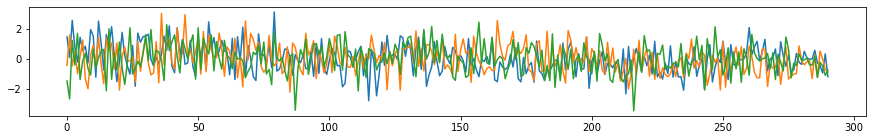

In [40]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
plt.figure(figsize = (15,2))

plt.plot(zscore(cn_audio_feature))
plt.plot(zscore(en_audio_feature))
plt.plot(zscore(fr_audio_feature))

all = np.stack((zscore(cn_audio_feature),
                zscore(en_audio_feature),
                zscore(fr_audio_feature)))

In [41]:
np.corrcoef(all)

array([[1.        , 0.05268146, 0.03052013],
       [0.05268146, 1.        , 0.02032064],
       [0.03052013, 0.02032064, 1.        ]])

In [43]:
fr_data = np.load('../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppFR-run-01_resampled291.npy')
#print(fr_data.shape)

resmat_all = np.nanmean(fr_data, axis = 2)
print(resmat_all.shape)

(291, 293)


179
0.3167213825387848


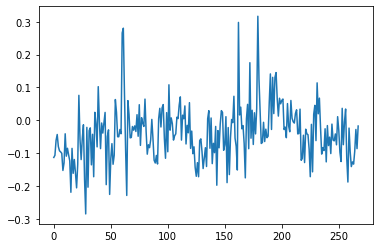

In [44]:
res      = []
tr_shift = 2
trans = 10  #this is to overcome the transients (which they didn't do in the original exp.)

for i in range(268):
    res.append(np.corrcoef(zscore(resmat_all[(trans+tr_shift):(-trans), i]), 
                           zscore(fr_audio_feature[(trans):(-trans-tr_shift)])
                          )[0,1])
    
plt.plot(res);

print(np.argmax(res))
print(np.max(res))

In [10]:
#plt.plot(res)

In [11]:
import nilearn
from nilearn import plotting, input_data

shen_file       = '../data_lpp/fmri_data/other/shen_2mm_268_parcellation.nii'
#nilearn.plotting.plot_roi(shen_file,  cmap = 'prism',);
shen_masker = nilearn.input_data.NiftiLabelsMasker(labels_img=shen_file);

sample_file = '../data_lpp/fmri_data/other/func.nii'
shen_masker.fit_transform(sample_file);

In [12]:
'''

res = np.asarray(res)
res[(res > -0.03) & (res<0.03) ] = 0

r2 = np.reshape(res, (1,268))
print(r2.shape)

res_img = shen_masker.inverse_transform(r2);
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=False, 
                          annotate = False,
                          cmap="Greens", 
                          threshold=0.03,
                          plot_abs=False, 
                         );'''



'\n\nres = np.asarray(res)\nres[(res > -0.03) & (res<0.03) ] = 0\n\nr2 = np.reshape(res, (1,268))\nprint(r2.shape)\n\nres_img = shen_masker.inverse_transform(r2);\nplotting.plot_glass_brain(nilearn.image.index_img(res_img,0), \n                          colorbar=False, \n                          annotate = False,\n                          cmap="Greens", \n                          threshold=0.03,\n                          plot_abs=False, \n                         );'

In [13]:
'''nilearn.plotting.view_img(nilearn.image.index_img(res_img,0), 
                          threshold=0.0,
                         )'''


'nilearn.plotting.view_img(nilearn.image.index_img(res_img,0), \n                          threshold=0.0,\n                         )'

0.2803312396926354
(1, 268)


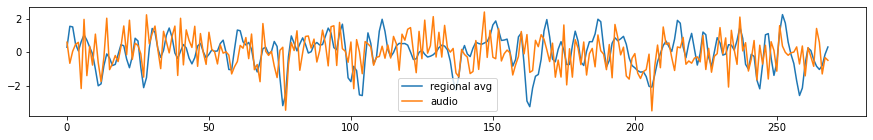

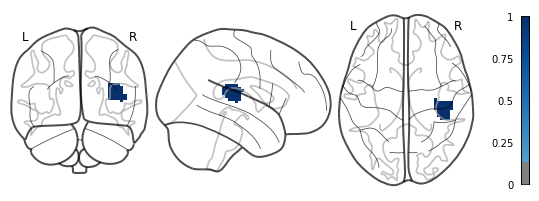

In [46]:
#'''
region_to_plot = 61

plt.figure(figsize = (15,2))
plt.plot(zscore(resmat_all[(trans+tr_shift):(-trans), region_to_plot]), label = 'regional avg');
plt.plot(zscore(fr_audio_feature[(trans):(-trans-tr_shift)]), label = 'audio');
plt.legend()

r = np.corrcoef(zscore(resmat_all[(trans+tr_shift):(-trans), region_to_plot]),
               zscore(fr_audio_feature[(trans):(-trans-tr_shift)]))[0,1]
print(r)

r2       = np.zeros((1,268))
r2[0,region_to_plot] = 1
print(r2.shape)

res_img  = shen_masker.inverse_transform(r2);
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=True, 
                          annotate = True,
                          cmap="Blues", 
                          threshold=0.15,
                          plot_abs=False, 
                         );#'''

0.045505115206243105
-0.006703020940984975
0.1772061930168458


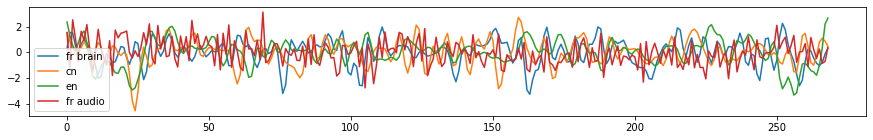

In [51]:
fr_data = np.load('../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppFR-run-01_resampled291.npy')
fr_resmat_all = np.nanmean(fr_data, axis = 2)

cn_data = np.load('../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppCN-run-01_resampled291.npy')
cn_resmat_all = np.nanmean(cn_data, axis = 2)

en_data = np.load('../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppEN-run-01_resampled291.npy')
en_resmat_all = np.nanmean(en_data, axis = 2)


region_to_plot = 61

plt.figure(figsize = (15,2))
plt.plot(zscore(fr_resmat_all[(trans+tr_shift):(-trans), region_to_plot]), label = 'fr brain');
plt.plot(zscore(cn_resmat_all[(trans+tr_shift):(-trans), region_to_plot]), label = 'cn');
plt.plot(zscore(en_resmat_all[(trans+tr_shift):(-trans), region_to_plot]), label = 'en');
plt.plot(zscore(cn_audio_feature[(trans):(-trans-tr_shift)]), label = 'fr audio');
plt.legend()

r = np.corrcoef(zscore(fr_resmat_all[(trans+tr_shift):(-trans), region_to_plot]),
               zscore(en_audio_feature[(trans):(-trans-tr_shift)]))[0,1]
print(r)

r = np.corrcoef(zscore(cn_resmat_all[(trans+tr_shift):(-trans), region_to_plot]),
               zscore(en_audio_feature[(trans):(-trans-tr_shift)]))[0,1]
print(r)

r = np.corrcoef(zscore(en_resmat_all[(trans+tr_shift):(-trans), region_to_plot]),
               zscore(en_audio_feature[(trans):(-trans-tr_shift)]))[0,1]
print(r)

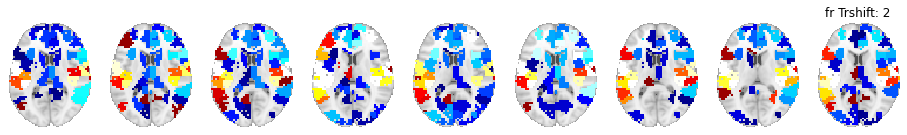

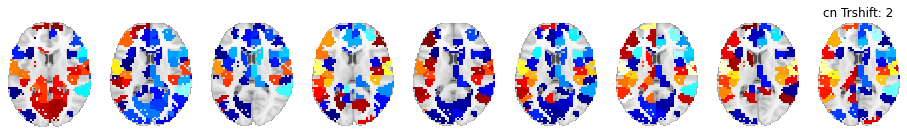

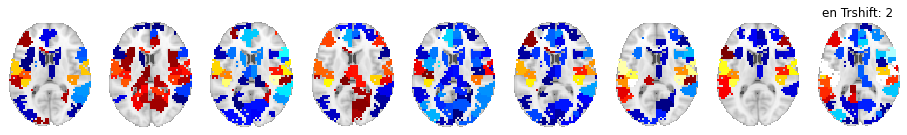

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import zscore


tr_shifts = [2] #[-2,-1,0,1,2]

for tr_shift in tr_shifts:

    trans = 10  #this is to overcome the transients (which they didn't do in the original exp.)

    common_run_lenghts = [291, 315, 338, 308, 283, 371, 340, 293, 368]
    langs = ['fr', 'cn' , 'en']
    langsC = ['FR', 'CN' , 'EN']
    imgs_list = []
    llist = []

    for llang in range(3):
        curr_lang = langs[llang]
        curr_langC = langsC[llang]
        f = plt.figure(figsize=(16, 4))

        n_runs = 9
        for curr_run in range(n_runs):
            ax = f.add_subplot(1, n_runs, curr_run + 1)

            c_audio_feature = np.load('../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/resampled_audiofeature_' + str(curr_lang) + '_section' +str(curr_run +1) + '.npy')
            c_data = np.load('../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lpp' + str(curr_langC) + '-run-0' +str(curr_run+1) + '_resampled' + str(common_run_lenghts[curr_run]) + '.npy')
            resmat_all = np.nanmean(c_data, axis = 2)

            res = []
            for i in range(268):
                res.append(np.corrcoef(zscore(resmat_all[(trans+tr_shift):(-trans), i]), 
                                       zscore(c_audio_feature[(trans):(-trans-tr_shift)]))[0,1])

            res = np.asarray(res)
            #res[(res > -0.03) & (res<0.03) ] = 0
            res_img = shen_masker.inverse_transform( np.reshape(res, (1,268)) );
            imgs_list.append(nilearn.image.index_img(res_img,0))
            llist.append(str(curr_lang) + str(curr_run+1))

            plotting.plot_stat_map( nilearn.image.index_img(res_img,0), 
                                    colorbar     = False, 
                                    annotate     = False,
                                    display_mode = 'z',
                                    cut_coords   = [10], #(44, -18, 10),
                                    threshold    = 0.05,
                                    vmax         = 0.3,
                                    axes         = ax);

            ax.set_aspect('equal')

        f.subplots_adjust(wspace=0, hspace=0)
        ctl = curr_lang + " Trshift: " + str(tr_shift)
        plt.title(ctl)
        plt.show()



In [30]:
#llist


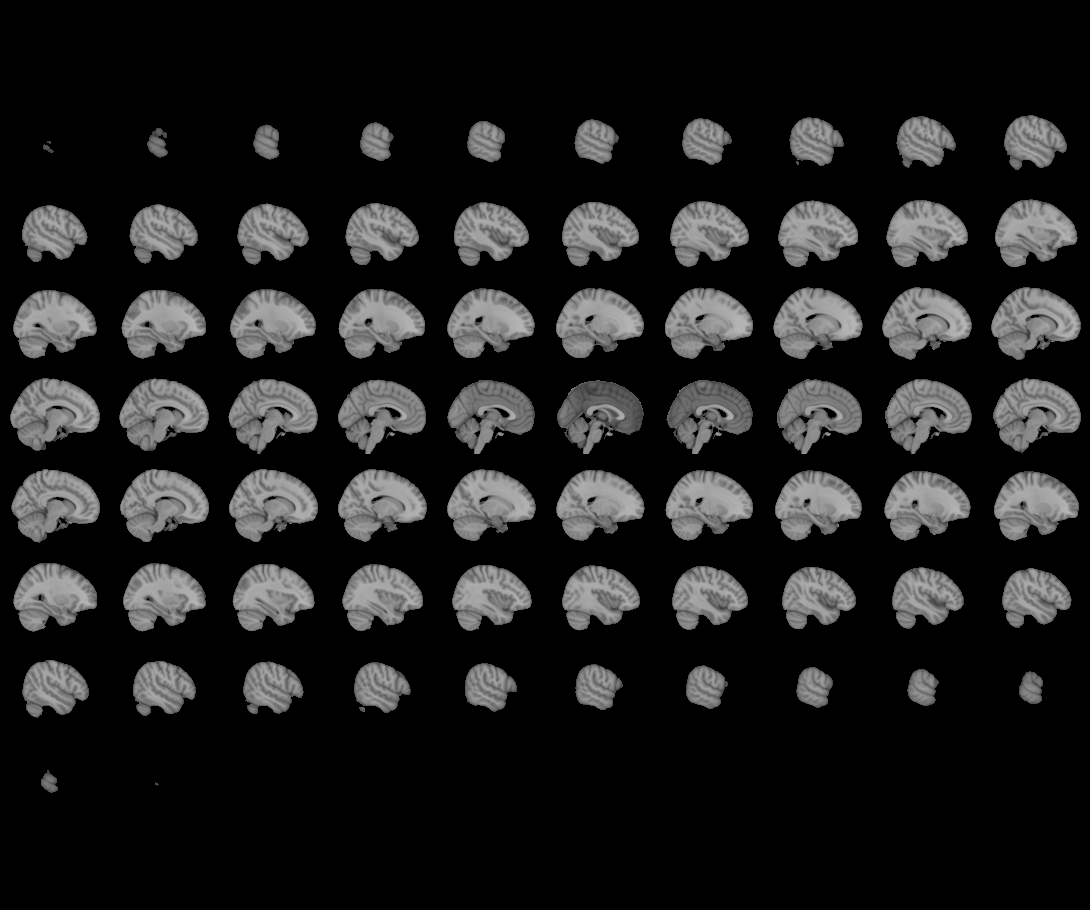
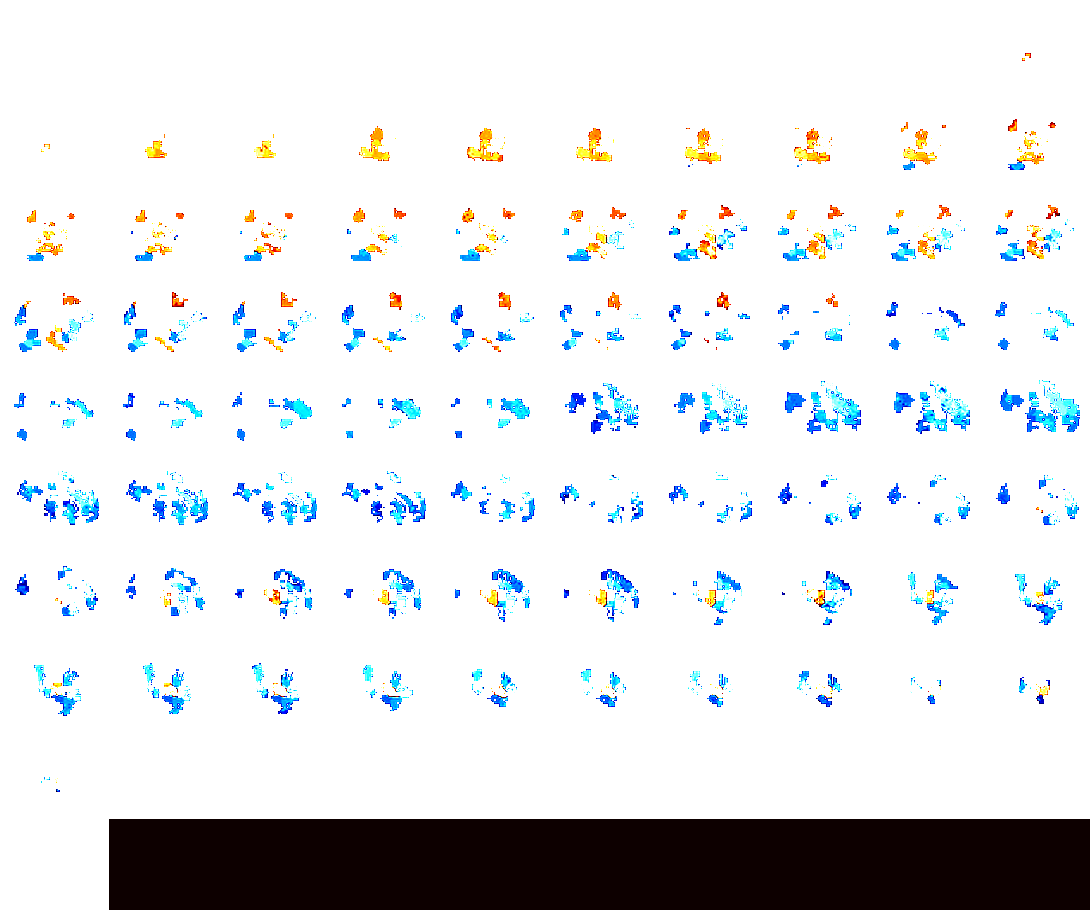

In [31]:
alli = nilearn.image.concat_imgs(imgs_list) 
meani = nilearn.image.mean_img(alli)
plotting.view_img( meani , 
                                    colorbar     = True, 
                                    annotate     = False,
                                    #display_mode = 'z',
                                    #cut_coords   = [10], #(44, -18, 10),
                                    threshold    = 0.07,
                                    vmax         = 0.15,
                                    title = 'mean')


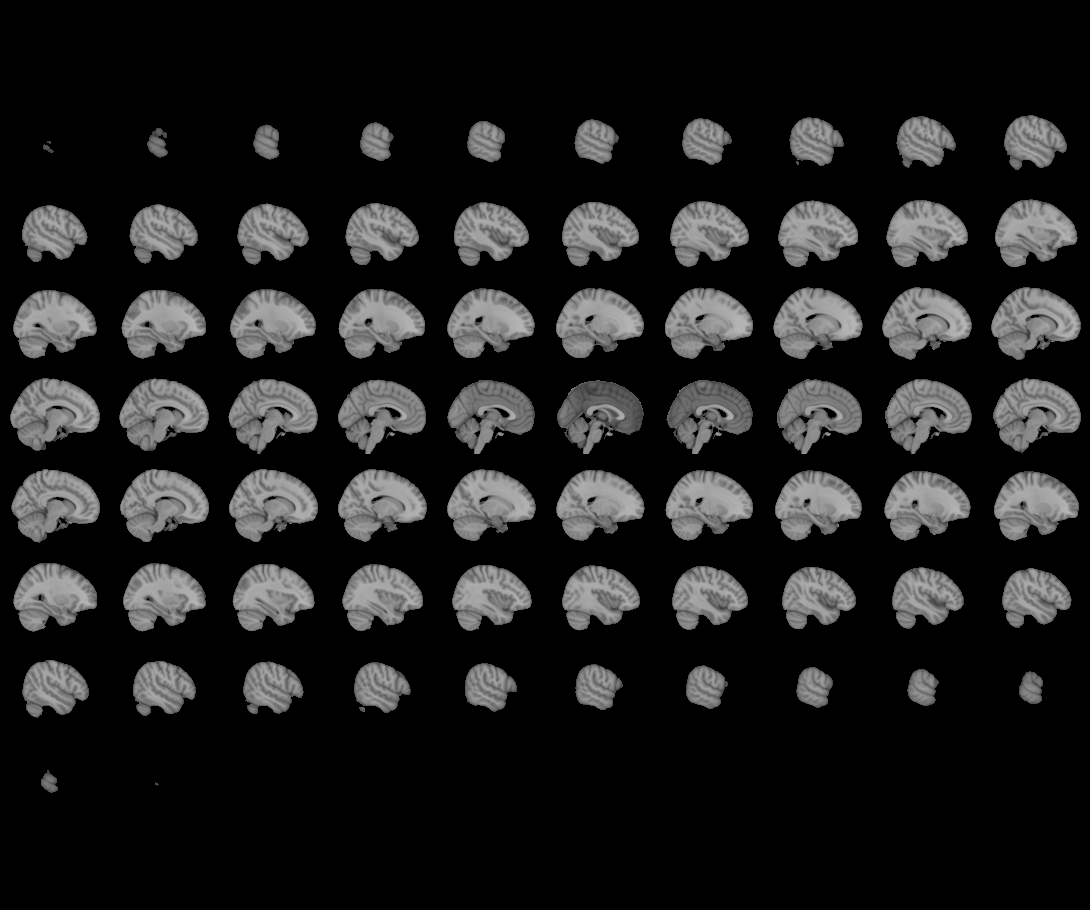
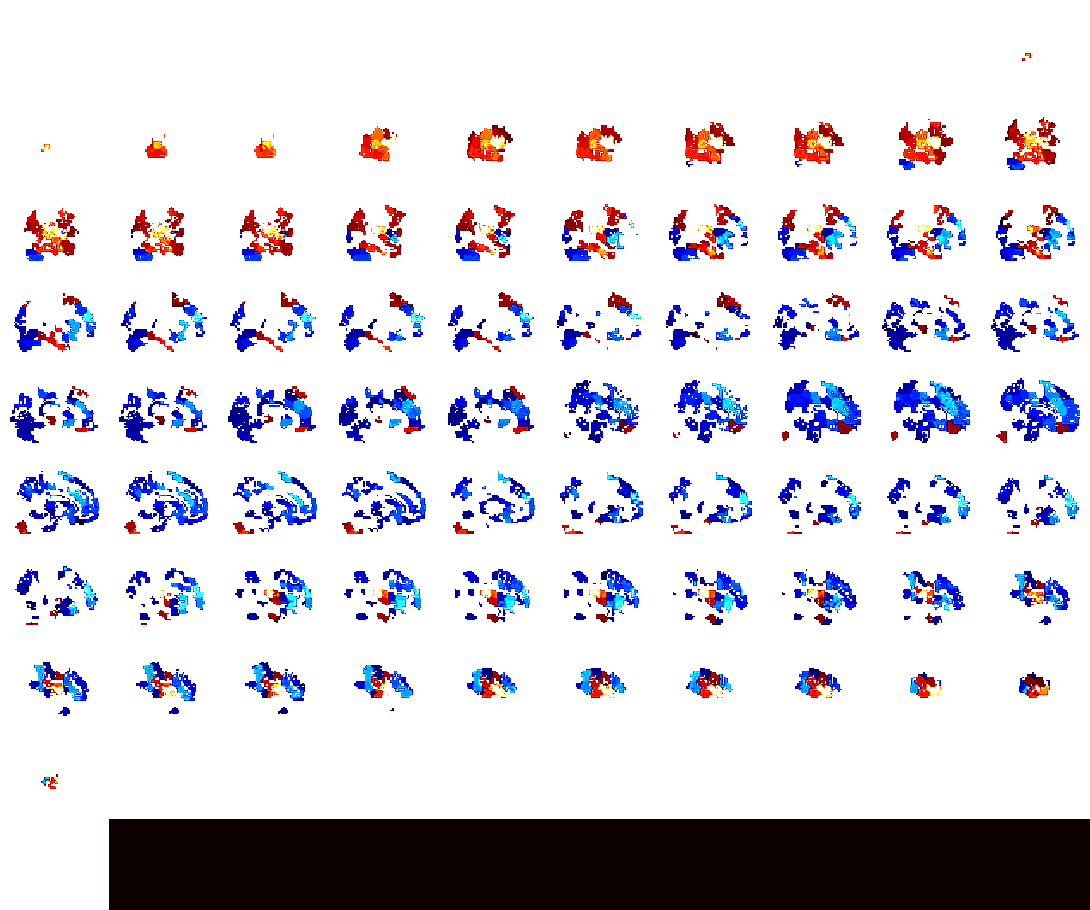

In [32]:
fri = nilearn.image.concat_imgs(imgs_list[:9]) 
meanfri  = nilearn.image.mean_img(fri )
plotting.view_img( meanfri, 
                                colorbar     = False, 
                                annotate     = False,
                                #display_mode = 'z',
                                #cut_coords   = [10], #(44, -18, 10),
                                threshold    = 0.05,
                                vmax         = 0.3)



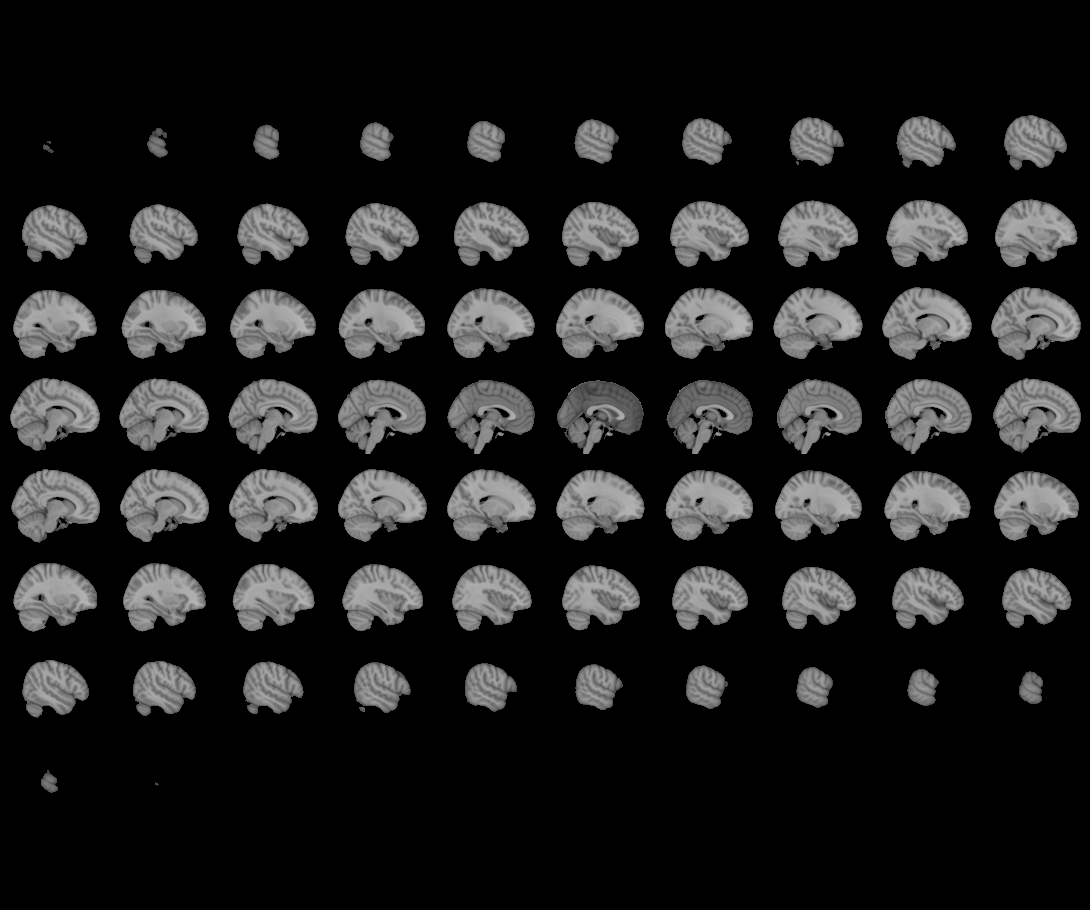
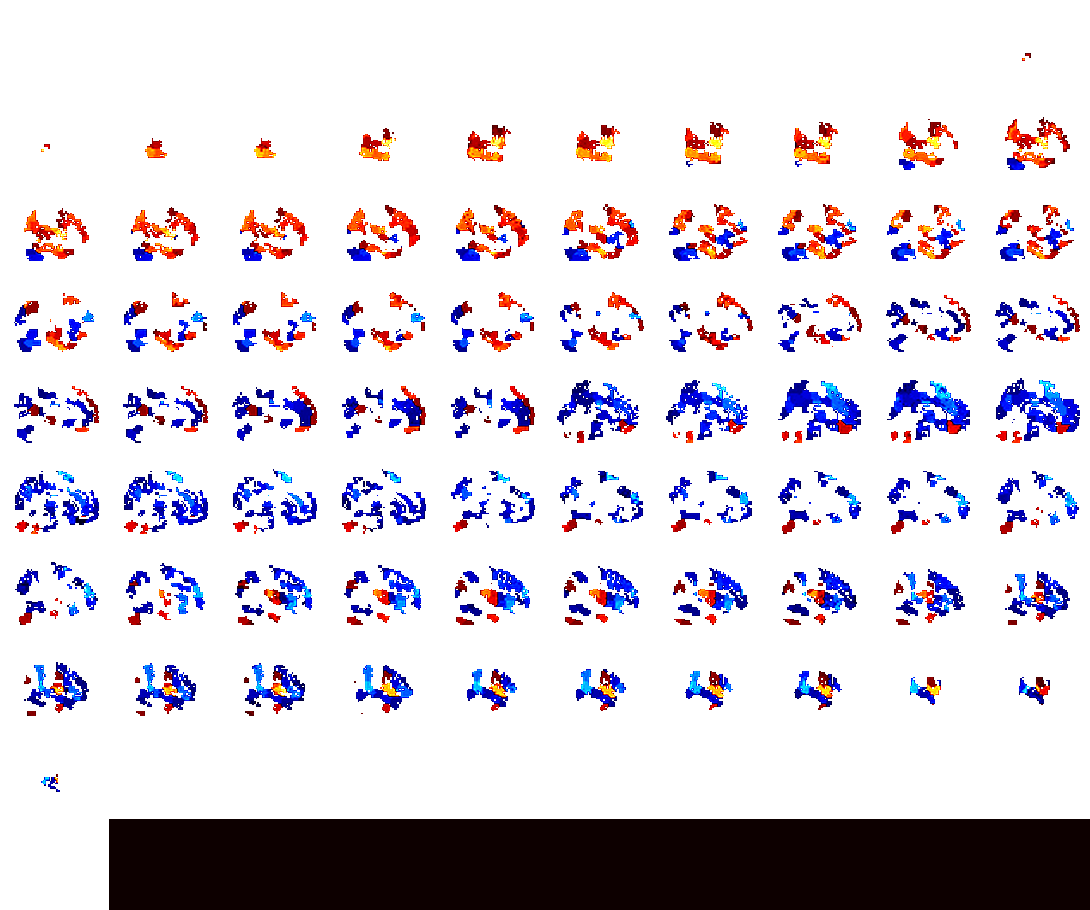

In [33]:
cni = nilearn.image.concat_imgs(imgs_list[9:18]) 
meancni  = nilearn.image.mean_img(cni )
plotting.view_img( meancni, 
                                colorbar     = False, 
                                annotate     = False,
                                #display_mode = 'z',
                                #cut_coords   = [10], #(44, -18, 10),
                                threshold    = 0.05,
                                vmax         = 0.3)


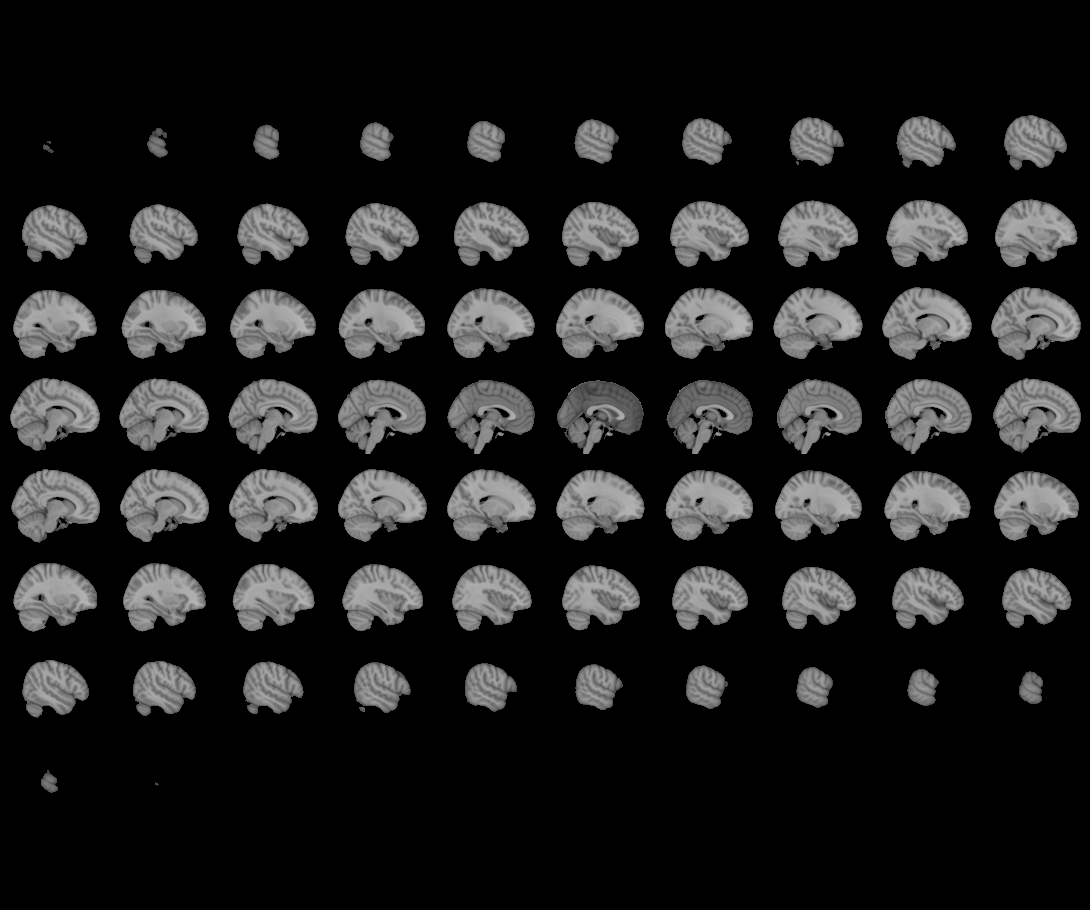
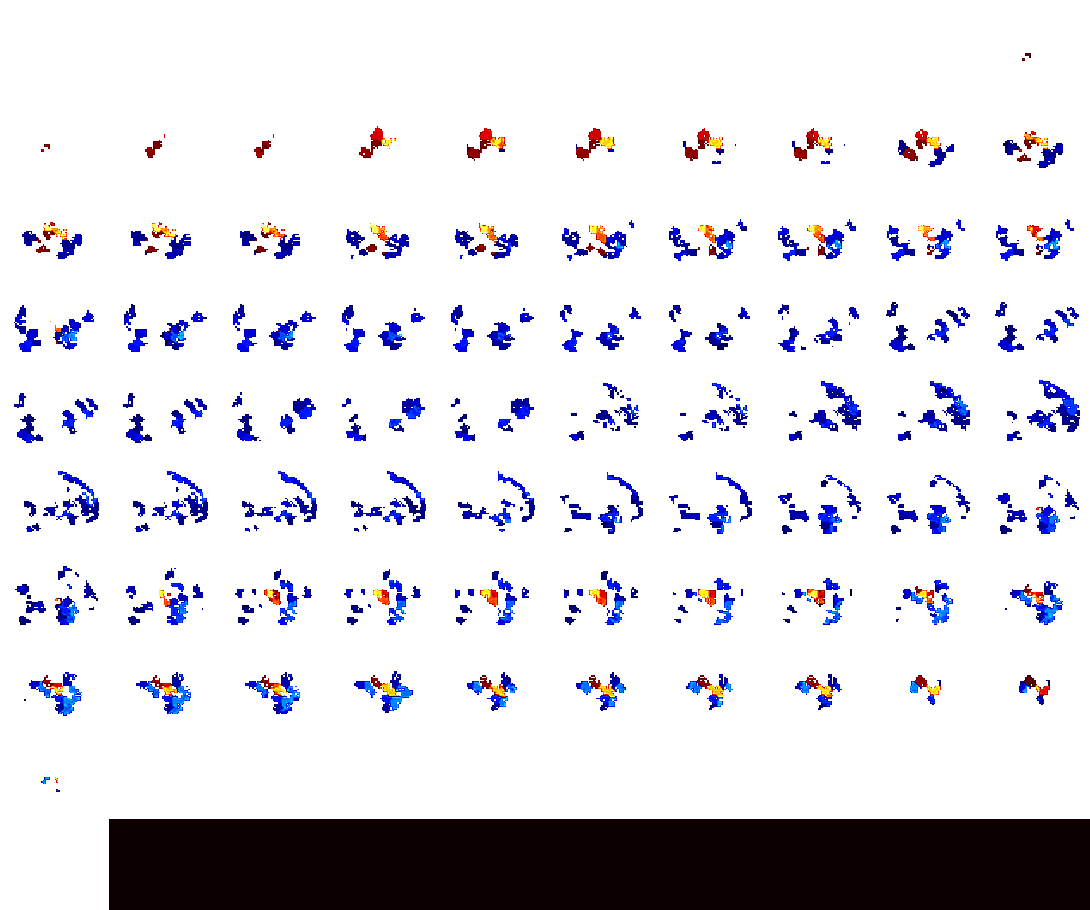

In [34]:
eni = nilearn.image.concat_imgs(imgs_list[18:]) 
meaneni  = nilearn.image.mean_img(eni )
plotting.view_img( meaneni, 
                                colorbar     = False, 
                                annotate     = False,
                                #display_mode = 'z',
                                #cut_coords   = [10], #(44, -18, 10),
                                threshold    = 0.05,
                                vmax         = 0.3)


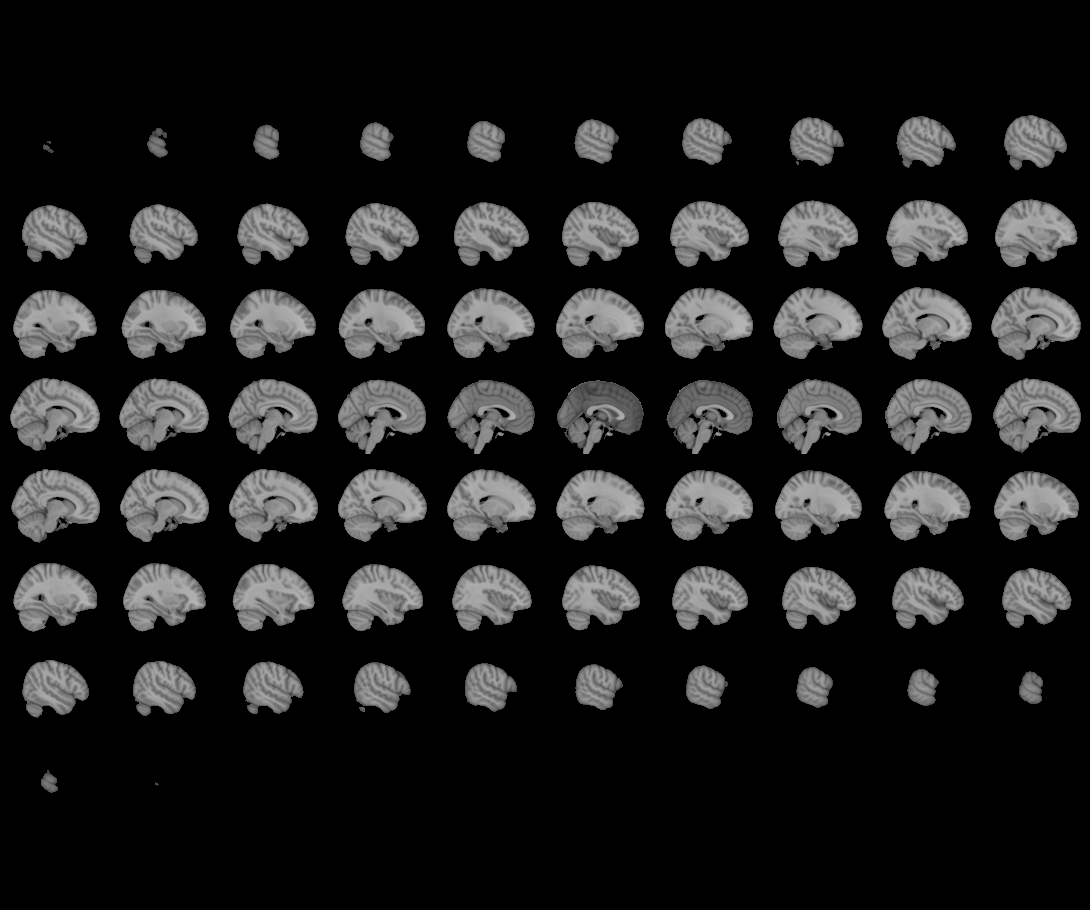
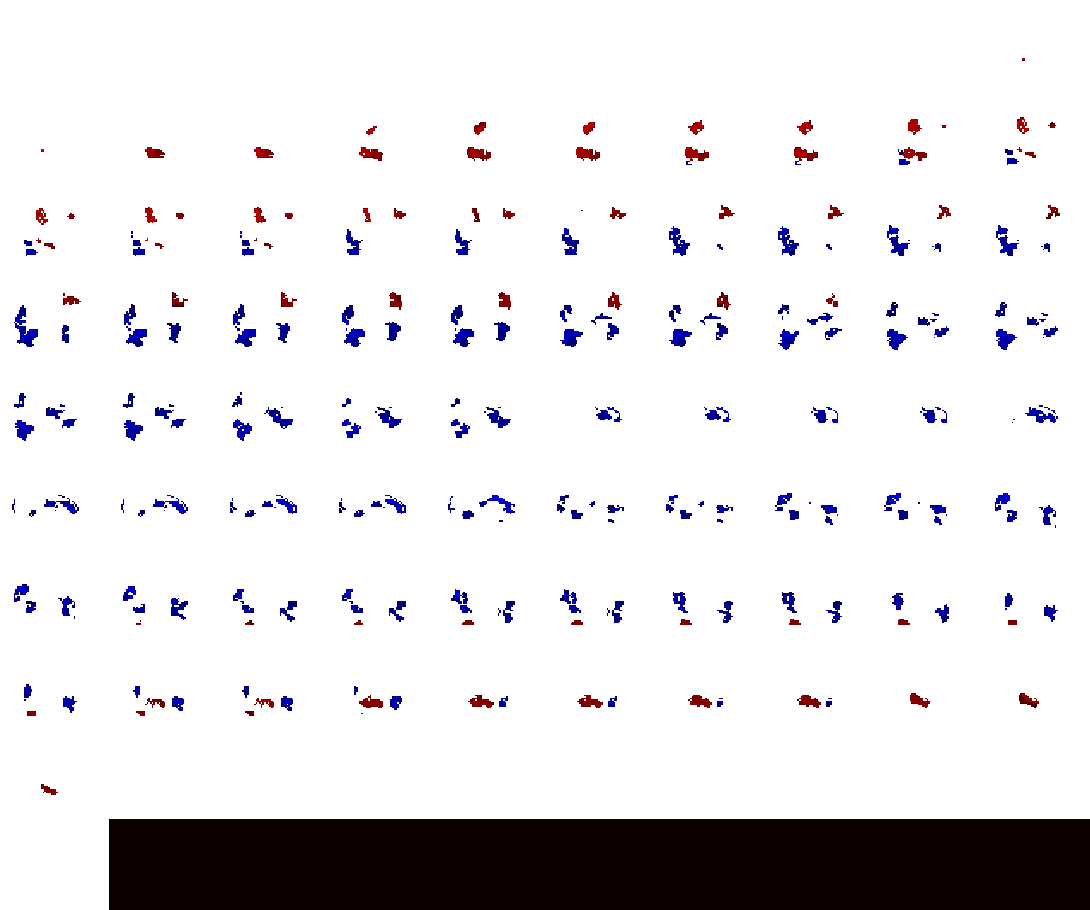

In [32]:
eni = nilearn.image.concat_imgs(imgs_list[18:]) 
meaneni  = nilearn.image.mean_img(eni )
plotting.view_img( meaneni, 
                                colorbar     = False, 
                                annotate     = False,
                                #display_mode = 'z',
                                #cut_coords   = [10], #(44, -18, 10),
                                threshold    = 0.05,
                                vmax         = 0.3)